<a href="https://colab.research.google.com/github/Flor-Si/Trabajo-Final-Ing-2025/blob/main/TRABAJO%20FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CALIDAD DEL AIRE**

Como base presentamos los datos de la OMS (Organización Mundual de la Salud) sobre la calidad del aire ambiente que recopila las mediciones terrestres de las concentraciones medias anuales de dióxido de nitrógeno (NO 2 ), material particulado de un diámetro igual o menor a 10 μm (PM 10 ) o igual o menor a 2,5 μm (PM 2,5 ), que tienen como objetivo representar un promedio para la ciudad o pueblo en su conjunto, en lugar de para estaciones individuales. Ambos grupos de contaminantes se originan principalmente de actividades humanas relacionadas con la combustión de combustibles fósiles. Para presentar datos de calidad del aire que representen la exposición humana, utilizamos principalmente mediciones urbanas, que comprenden el fondo urbano, las áreas residenciales, las áreas comerciales y mixtas o las áreas rurales y las áreas industriales cercanas a los asentamientos urbanos.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn

In [2]:
#  Leemos nuevamente los datos del CSV Calidad del Aire
calidad = pd.read_excel('/content/who_aap_2021_v9_11august2022 -final.xlsx')

In [3]:
#Previsualización de base de datos
calidad.head()

,WHO Region,ISO3,WHO Country Name,City or Locality,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Reference,Number and type of monitoring stations,Version of the database,Status,Column16,Column17
0,Eastern Mediterranean Region,AFG,Afghanistan,Kabul,2019,119.77,NaN,NaN,18.0,NaN,NaN,"U.S. Department of State, United States Enviro...",NaN,2022,NaN,NaN,NaN
1,European Region,ALB,Albania,Durres,2015,NaN,17.65,26.63,NaN,NaN,83.961187,European Environment Agency (downloaded in 2021),NaN,2022,NaN,NaN,NaN
2,European Region,ALB,Albania,Durres,2016,14.32,24.56,24.78,NaN,NaN,87.932605,European Environment Agency (downloaded in 2021),NaN,2022,NaN,NaN,NaN
3,European Region,ALB,Albania,Elbasan,2015,NaN,NaN,23.96,NaN,NaN,97.853881,European Environment Agency (downloaded in 2021),NaN,2022,NaN,NaN,NaN
4,European Region,ALB,Albania,Elbasan,2016,NaN,NaN,26.26,NaN,NaN,96.049636,European Environment Agency (downloaded in 2021),NaN,2022,NaN,NaN,NaN


In [ ]:
#Observamos el tipo de las varibles que contiene , si son Int,Float,Object
calidad.dtypes

,0
WHO Region,object
ISO3,object
WHO Country Name,object
City or Locality,object
Measurement Year,int64
PM2.5 (μg/m3),float64
PM10 (μg/m3),float64
NO2 (μg/m3),float64
PM25 temporal coverage (%),float64
PM10 temporal coverage (%),float64


In [ ]:
#Imprimimos para ver las cantidad de datos en las filas y columnas que tenemos y si se observa un NaN (nulo)
print(calidad)

                         WHO Region ISO3 WHO Country Name City or Locality  \
0      Eastern Mediterranean Region  AFG      Afghanistan            Kabul   
1                   European Region  ALB          Albania           Durres   
2                   European Region  ALB          Albania           Durres   
3                   European Region  ALB          Albania          Elbasan   
4                   European Region  ALB          Albania          Elbasan   
...                             ...  ...              ...              ...   
32186                African Region  ZAF     South Africa       West Coast   
32187                African Region  ZAF     South Africa       West Coast   
32188                African Region  ZAF     South Africa       West Coast   
32189                African Region  ZAF     South Africa       West Coast   
32190                African Region  ZAF     South Africa        West Rand   

       Measurement Year  PM2.5 (μg/m3)  PM10 (μg/m3)  NO2 (μg/m

In [ ]:
#Observamos la cantidad de filas y columnas de nuestro dataset
calidad.shape

(32191, 17)

In [ ]:
#Vemos la cantidad de columnas que contiene nuestro dataset
print(calidad.columns)

Index(['WHO Region', 'ISO3', 'WHO Country Name', 'City or Locality',
       'Measurement Year', 'PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)',
       'PM25 temporal coverage (%)', 'PM10 temporal coverage (%)',
       'NO2 temporal coverage (%)', 'Reference',
       'Number and type of monitoring stations', 'Version of the database',
       'Status', 'Column16', 'Column17'],
      dtype='object')


In [ ]:
#Se utiliza para una descripción estadistica del DataFrame y nos devuelve la cantidad de valores no nulos, media (promedio),desviación estandar,Valor minimo,Q1,Q2.Q3 y valor máximo.
calidad.describe()

,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Version of the database,Status,Column16,Column17
count,32191.000000,15048.000000,21109.000000,22200.000000,7275.000000,5381.000000,19890.000000,32191.000000,0.0,0.0,0.0
mean,2015.579354,22.920320,30.533252,20.619336,90.794096,90.583500,93.696804,2021.744214,NaN,NaN,NaN
std,2.752654,17.925906,29.312756,12.133388,14.872681,13.816311,10.451751,1.051897,NaN,NaN,NaN
min,2000.000000,0.010000,1.040000,0.000000,0.000000,2.568493,1.923077,2016.000000,NaN,NaN,NaN
25%,2014.000000,10.350000,16.980000,12.000000,88.595890,87.945205,93.207763,2022.000000,NaN,NaN,NaN
50%,2016.000000,16.000000,22.000000,18.800000,97.000000,96.039000,96.369863,2022.000000,NaN,NaN,NaN
75%,2018.000000,31.000000,31.300000,27.160000,99.000000,98.938000,98.926941,2022.000000,NaN,NaN,NaN
max,2021.000000,191.900000,540.000000,210.680000,100.000000,100.000000,100.000000,2022.000000,NaN,NaN,NaN


In [ ]:
#Utilizamos la función info que nos determina que es un "DataFrame" y nos da la posibilidad de analizarlo y nos dice cuantos no nulos tenemos
calidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32191 entries, 0 to 32190
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   WHO Region                              32190 non-null  object 
 1   ISO3                                    32191 non-null  object 
 2   WHO Country Name                        32191 non-null  object 
 3   City or Locality                        32191 non-null  object 
 4   Measurement Year                        32191 non-null  int64  
 5   PM2.5 (μg/m3)                           15048 non-null  float64
 6   PM10 (μg/m3)                            21109 non-null  float64
 7   NO2 (μg/m3)                             22200 non-null  float64
 8   PM25 temporal coverage (%)              7275 non-null   float64
 9   PM10 temporal coverage (%)              5381 non-null   float64
 10  NO2 temporal coverage (%)               19890 non-null  fl

In [ ]:
#Evaluamos si tenemos NaN en las filas, imprimimos y nos muestras que no tenemos una fila con todos NaN
filas_nan= calidad[calidad.isnull().all(axis=1)]
filas_nan


,WHO Region,ISO3,WHO Country Name,City or Locality,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Reference,Number and type of monitoring stations,Version of the database,Status,Column16,Column17


In [ ]:
#Revisamos si hay algun NaN si hay en alguna fila o columna y nos imprime el nombre de las columnas que contenga algun NaN (nulo)
columnas_nan_alguno= calidad.columns[calidad.isna().any()]
columnas_nan_alguno

Index(['WHO Region', 'PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)',
       'PM25 temporal coverage (%)', 'PM10 temporal coverage (%)',
       'NO2 temporal coverage (%)', 'Reference',
       'Number and type of monitoring stations', 'Status', 'Column16',
       'Column17'],
      dtype='object')

<Axes: >

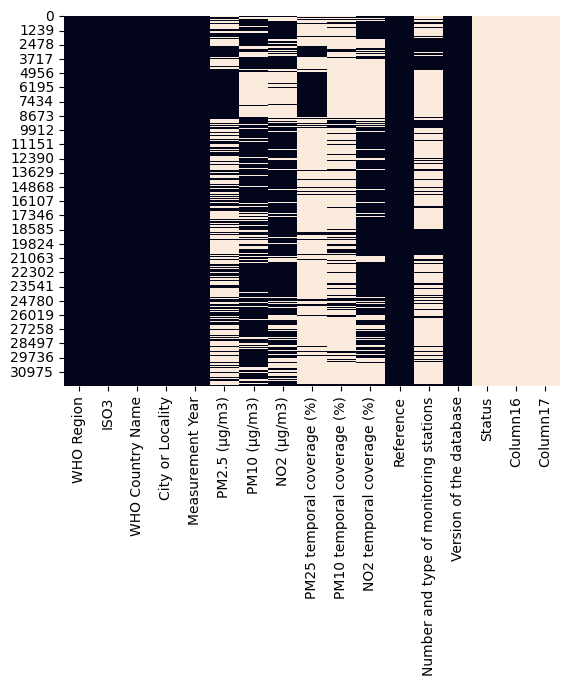

In [5]:
#Con este grafico determinamos los valores Faltantes de un Dataset.
sns.heatmap (calidad.isnull(),cbar=False)

In [ ]:
#Observamos los valores faltantes en cada uno de los features

calidad.isna().sum()

,0
WHO Region,1
ISO3,0
WHO Country Name,0
City or Locality,0
Measurement Year,0
PM2.5 (μg/m3),17143
PM10 (μg/m3),11082
NO2 (μg/m3),9991
PM25 temporal coverage (%),24916
PM10 temporal coverage (%),26810


In [ ]:
#Observamos cuanto representan los nulos obtenidos en cada uno de los features

calidad.isna().sum()/calidad.shape[0]*100

,0
WHO Region,0.003106
ISO3,0.000000
WHO Country Name,0.000000
City or Locality,0.000000
Measurement Year,0.000000
PM2.5 (μg/m3),53.254015
PM10 (μg/m3),34.425771
NO2 (μg/m3),31.036625
PM25 temporal coverage (%),77.400516
PM10 temporal coverage (%),83.284148


In [ ]:
# Elimina las columnas donde todos sus datos son faltantes (Columnas 16 y 17)
calidad= calidad.dropna(axis=1,how='all')
calidad


,WHO Region,ISO3,WHO Country Name,City or Locality,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Reference,Number and type of monitoring stations,Version of the database
0,Eastern Mediterranean Region,AFG,Afghanistan,Kabul,2019,119.77,NaN,NaN,18.0,NaN,NaN,"U.S. Department of State, United States Enviro...",NaN,2022
1,European Region,ALB,Albania,Durres,2015,NaN,17.65,26.63,NaN,NaN,83.961187,European Environment Agency (downloaded in 2021),NaN,2022
2,European Region,ALB,Albania,Durres,2016,14.32,24.56,24.78,NaN,NaN,87.932605,European Environment Agency (downloaded in 2021),NaN,2022
3,European Region,ALB,Albania,Elbasan,2015,NaN,NaN,23.96,NaN,NaN,97.853881,European Environment Agency (downloaded in 2021),NaN,2022
4,European Region,ALB,Albania,Elbasan,2016,NaN,NaN,26.26,NaN,NaN,96.049636,European Environment Agency (downloaded in 2021),NaN,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32186,African Region,ZAF,South Africa,West Coast,2015,7.47,24.64,7.64,75.0,75.0,75.000000,South African Air Quality Information System,3 Residential-Medium/Upper income,2022
32187,African Region,ZAF,South Africa,West Coast,2016,8.42,33.28,7.27,75.0,75.0,75.000000,South African Air Quality Information System,2 Residential-Medium/Upper income,2022
32188,African Region,ZAF,South Africa,West Coast,2017,6.83,20.49,8.72,75.0,75.0,75.000000,South African Air Quality Information System,2 Residential-Medium/Upper income,2022
32189,African Region,ZAF,South Africa,West Coast,2018,6.10,17.99,7.15,75.0,75.0,75.000000,South African Air Quality Information System,2 Residential-Medium/Upper income,2022


# **GRAFICOS**

In [ ]:
#Evaluamos si tenemos NaN en las filas alguna o alguna columna que contenga algun dato nulo
filas_nan_algunas= calidad[calidad.isnull().any(axis=1)]
filas_nan_algunas

,WHO Region,ISO3,WHO Country Name,City or Locality,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Reference,Number and type of monitoring stations,Version of the database
0,Eastern Mediterranean Region,AFG,Afghanistan,Kabul,2019,119.77,NaN,NaN,18.0,NaN,NaN,"U.S. Department of State, United States Enviro...",NaN,2022
1,European Region,ALB,Albania,Durres,2015,NaN,17.65,26.63,NaN,NaN,83.961187,European Environment Agency (downloaded in 2021),NaN,2022
2,European Region,ALB,Albania,Durres,2016,14.32,24.56,24.78,NaN,NaN,87.932605,European Environment Agency (downloaded in 2021),NaN,2022
3,European Region,ALB,Albania,Elbasan,2015,NaN,NaN,23.96,NaN,NaN,97.853881,European Environment Agency (downloaded in 2021),NaN,2022
4,European Region,ALB,Albania,Elbasan,2016,NaN,NaN,26.26,NaN,NaN,96.049636,European Environment Agency (downloaded in 2021),NaN,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32171,African Region,ZAF,South Africa,Uthungulu,2020,NaN,20.07,10.36,75.0,75.0,75.000000,South African Air Quality Information System,"2 Background, 2 Peri-urban, 1 Residential-Low ...",2022
32172,African Region,ZAF,South Africa,Uthungulu,2021,NaN,17.58,11.85,75.0,75.0,75.000000,South African Air Quality Information System,"2 Background, 1 Urban",2022
32184,African Region,ZAF,South Africa,West Coast,2011,NaN,22.22,16.36,75.0,75.0,75.000000,South African Air Quality Information System,1 Residential-Medium/Upper income,2022
32185,African Region,ZAF,South Africa,West Coast,2014,NaN,23.98,10.67,75.0,75.0,75.000000,South African Air Quality Information System,1 Residential-Medium/Upper income,2022


In [6]:
# @title WHO Region

from matplotlib import pyplot as plt
import seaborn as sns
filas_nan_algunas.groupby('WHO Region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name 'filas_nan_algunas' is not defined

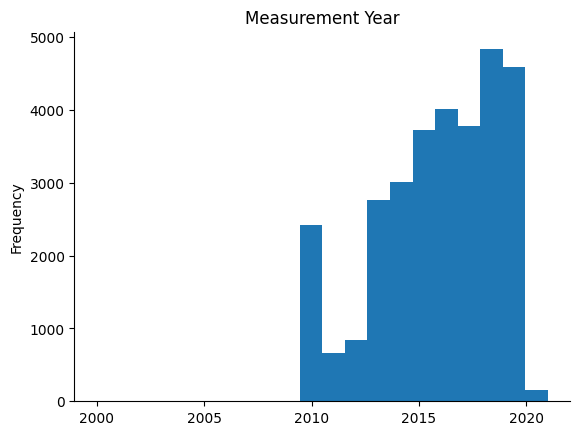

In [ ]:
# Mediciones del Año  , utilizamos matplotlib en la columna de

from matplotlib import pyplot as plt
filas_nan_algunas['Measurement Year'].plot(kind='hist', bins=20, title='Measurement Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
# Region vs Año de Medición

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(filas_nan_algunas['WHO Region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(filas_nan_algunas, x='Measurement Year', y='WHO Region', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

NameError: name 'filas_nan_algunas' is not defined

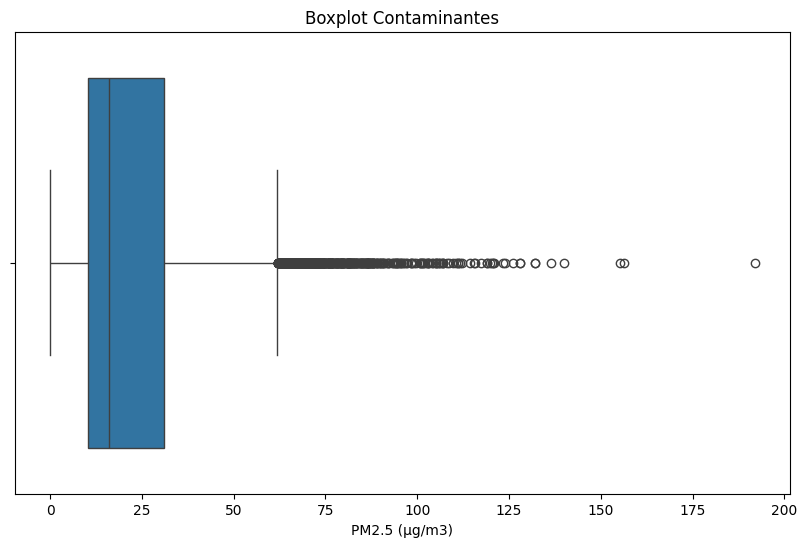

In [ ]:

# Boxplot de los contaminantes PM 2,5
plt.figure(figsize=(10, 6))
sns.boxplot(x='PM2.5 (μg/m3)',data=calidad)
plt.title('Boxplot Contaminantes')
plt.xlabel('PM2.5 (μg/m3)')
plt.show()

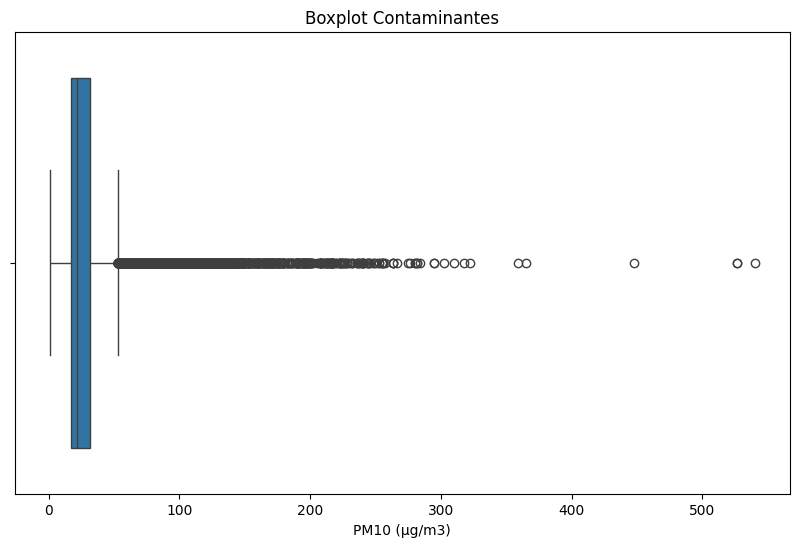

In [ ]:
# Boxplot de los contaminantes PM 10
plt.figure(figsize=(10, 6))
sns.boxplot(x='PM10 (μg/m3)',data=calidad)
plt.title('Boxplot Contaminantes')
plt.xlabel('PM10 (μg/m3)')
plt.show()

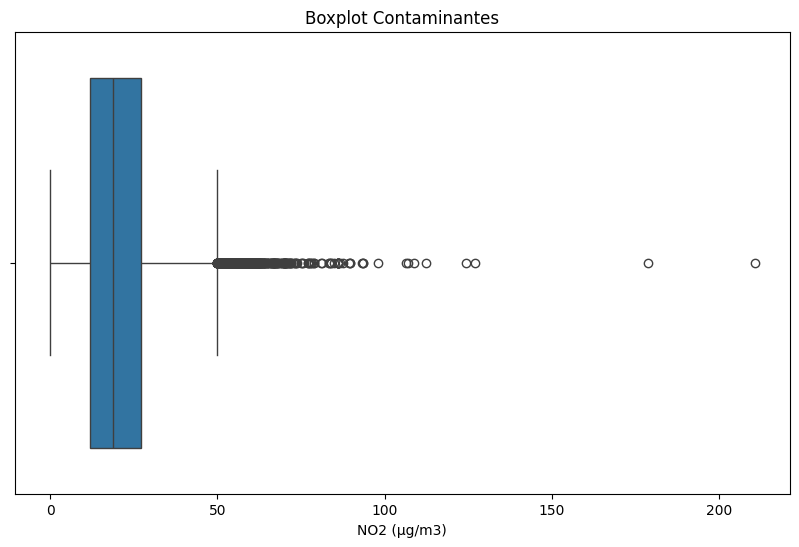

In [ ]:
# Boxplot de los contaminantes NO2
plt.figure(figsize=(10, 6))
sns.boxplot(x='NO2 (μg/m3)',data=calidad)
plt.title('Boxplot Contaminantes')
plt.xlabel('NO2 (μg/m3)')
plt.show()

<ipython-input-48-a8410c22cdf3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categorias_periodos, palette="Set2")


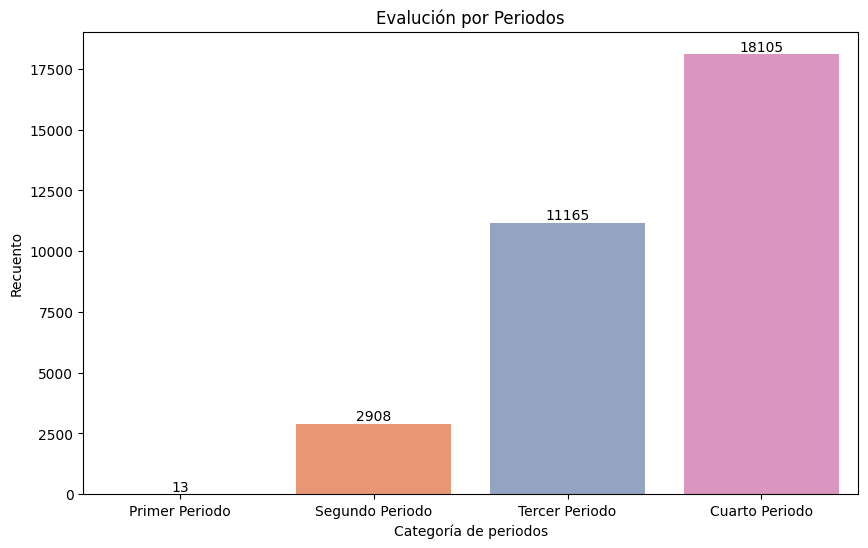

In [ ]:
# Límites de los bins
bin = [2000, 2005, 2010, 2015, 2021]
# [2000, 2005], [2005, 2010], [2010, 2015], [2015, 2021]

labels = ["Primer Periodo", "Segundo Periodo","Tercer Periodo", "Cuarto Periodo"]

# Cambiamos 'Evaluación por periodos' por 'Measurement Year' que es la columna correcta para categorizar por años
categorias_periodos = pd.cut(calidad["Measurement Year"], bins=bin, labels=labels, include_lowest=True)

# dataframe temporal - This dataframe is not used in the plotting code below, so it can be removed or adjusted if needed for other purposes.
# categorias_df = pd.DataFrame(calidad, columns=['Measurement Year']) # Removed as it's not directly used in the countplot

# Gráfico
plt.figure(figsize=(10, 6))
# Usamos las categorías_periodos creadas con pd.cut para el eje x del countplot
sns.countplot(x=categorias_periodos, palette="Set2")
plt.title('Evalución por Periodos')
plt.ylabel('Recuento')
plt.xlabel('Categoría de periodos') # Actualizado el label del eje x para reflejar los periodos

# Obtenemos los conteos de las categorías_periodos para anotar en el gráfico
counts = categorias_periodos.value_counts().sort_index()
for i, v in enumerate(counts.values):
    # Ajustamos la posición para las anotaciones si es necesario
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom', fontsize=10)

plt.show()



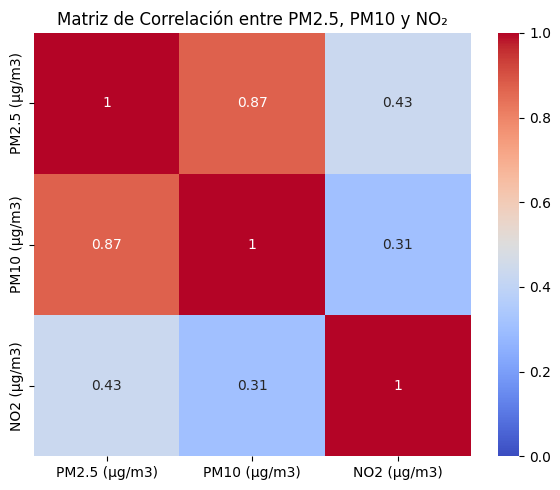

In [ ]:
# Grafico
# Calcular matriz de correlación
variables = ['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)']
calidad_selected =calidad[variables]

# Calcular matriz de correlación
corr = calidad_selected.corr()

# Graficar
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-0, vmax=1)
plt.title('Matriz de Correlación entre PM2.5, PM10 y NO₂')
plt.tight_layout()
plt.show()



In [ ]:

from sklearn.impute import SimpleImputer

In [ ]:
imputer_most_frequent = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

In [ ]:
calidad['WHO Region'].unique()

array(['Eastern Mediterranean Region', 'European Region',
       'Region of the Americas', 'Western Pacific Region',
       'South East Asia Region', 'African Region', nan], dtype=object)

In [ ]:

calidad['WHO Region'].value_counts()

,count
WHO Region,
European Region,20292
Western Pacific Region,4798
Region of the Americas,3957
South East Asia Region,2514
Eastern Mediterranean Region,438
African Region,191


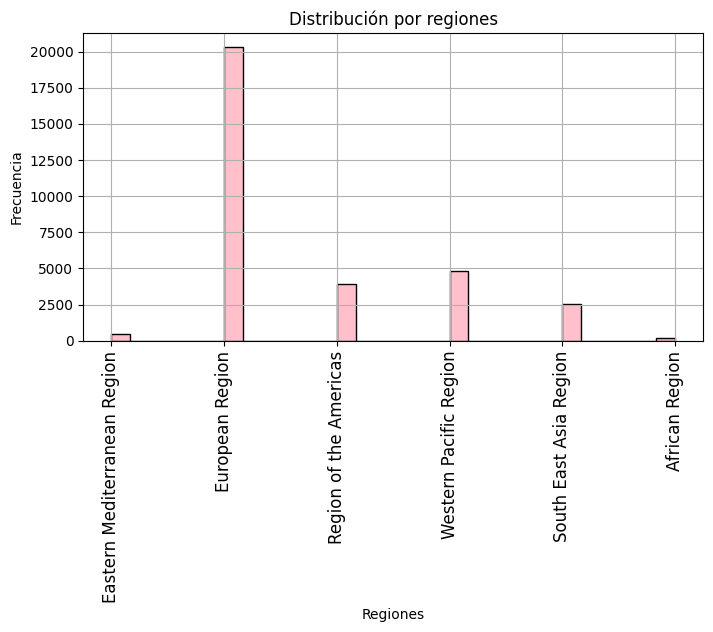

In [ ]:
# HISTOGRAMA

plt.figure(figsize=(8, 4))
plt.hist(calidad['WHO Region'].dropna(), bins=30, color='pink', edgecolor='black')
plt.title('Distribución por regiones')
plt.xlabel('Regiones')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, fontsize=12)
plt.grid(True)
plt.show()